<a href="https://colab.research.google.com/github/lattapol1st/pp/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('https://raw.githubusercontent.com/lattapol1st/pp/main/POWER_Point_Daily_20001201_20221201_016d47N_102d83E_LST.csv')

In [89]:
df.head()

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN
0,2000,12,1,191.9
1,2000,12,2,176.3
2,2000,12,3,160.1
3,2000,12,4,175.2
4,2000,12,5,202.8


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               8036 non-null   int64  
 1   MO                 8036 non-null   int64  
 2   DY                 8036 non-null   int64  
 3   ALLSKY_SFC_SW_DWN  8036 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 251.2 KB


In [91]:
X = df

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [93]:
X

array([[-1.79770891,  1.58775965, -1.67338161, -0.42539811],
       [-1.79770891,  1.58775965, -1.55975467, -0.79251047],
       [-1.79770891,  1.58775965, -1.44612772, -1.17374253],
       ...,
       [ 1.66646411,  1.29781654,  1.5081729 , -0.3748025 ],
       [ 1.66646411,  1.29781654,  1.62179984, -0.56377123],
       [ 1.66646411,  1.58775965, -1.67338161, -0.55059284]])

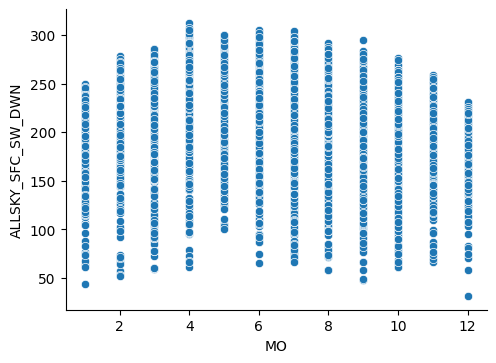

In [98]:
g = sns.pairplot(x_vars = 'MO',
                 y_vars = 'ALLSKY_SFC_SW_DWN',
                 data = df)
g.fig.set_size_inches(6,4)

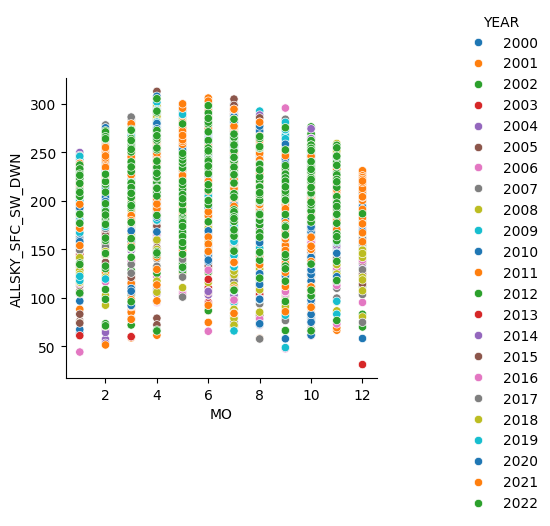

In [99]:
g = sns.pairplot(x_vars = 'MO',
                 y_vars = 'ALLSKY_SFC_SW_DWN',
                 hue = 'YEAR',
                 palette = "tab10",
                 data = df)
g.fig.set_size_inches(6,4)

In [100]:
#1. K-means
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5,init='k-means++')
#ฟิต model กับ ข้อมูล X
model.fit(X)
#ตรวจสอบ Cluster labels
model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, ..., 4, 4, 0], dtype=int32)

In [101]:
#สร้าง column ใหม่ เป็น cluster labels
df['cluster'] = model.labels_
#คำนวณหาจุด centroid
df.groupby('cluster').mean()

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN
cluster,,,,
0,2011.128527,9.719749,7.445141,207.433379
1,2005.778390,3.545204,14.687982,231.921582
2,2017.591099,3.960733,15.585864,234.396230
3,2011.859596,6.779798,16.015152,130.151030
4,2010.522872,9.389114,24.458020,208.028442


In [102]:
df.head()

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,cluster
0,2000,12,1,191.9,0
1,2000,12,2,176.3,0
2,2000,12,3,160.1,0
3,2000,12,4,175.2,0
4,2000,12,5,202.8,0


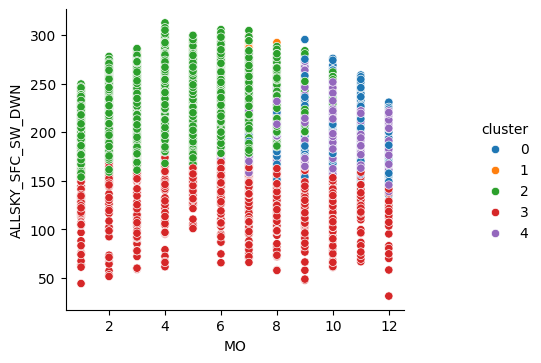

In [103]:
g = sns.pairplot(x_vars = 'MO',
                 y_vars = 'ALLSKY_SFC_SW_DWN',
                 hue = 'cluster',
                 palette = "tab10",
                 data = df)
g.fig.set_size_inches(6,4)

In [104]:
import plotly.express as px
import plotly
#นิยามสีของ cluster (ใส่ตามจำนวน cluster)
colors = np.arange(5)
#คำสั่ง Scatter plot
fig = px.scatter_3d(df, x='MO', y='ALLSKY_SFC_SW_DWN', z='YEAR',        color=colors[list(model.labels_)],color_continuous_scale  = plotly.colors.sequential.Jet)
#Show the figure
fig.show()


In [213]:
#1. K-means
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5,init='k-means++')
#ฟิต model กับ ข้อมูล X
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5)

In [214]:
from sklearn.metrics import silhouette_score
silhouette_score(X, model.labels_)

0.3002808405303337

In [215]:
#นิยามช่วงของ k
k_range = range(2, 20)
#สร้างตัวแปร scores และ inertia เพื่อเก็บค่าดังกล่าว
scores = {}
inertia=[]
for k in k_range: #Iterate through k
    #สร้าง model (ใช้อันไหนก็ได้)
    model = KMeans(n_clusters=k,init='k-means++')
    #ฟิต model กับ ชุดข้อมูล X
    model.fit(X)
    #เก็บค่า inertia (เฉพาะ k-means!!!!)
    inertia.append(model.inertia_)
    #เก็บค่า scores
    scores[k]=silhouette_score(X, model.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

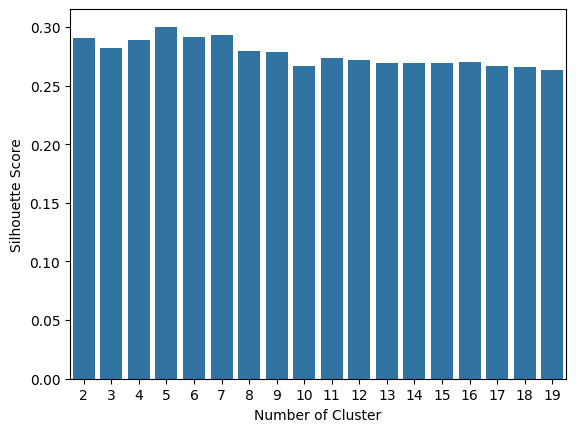

In [216]:
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("Silhouette Score")
plt.show()

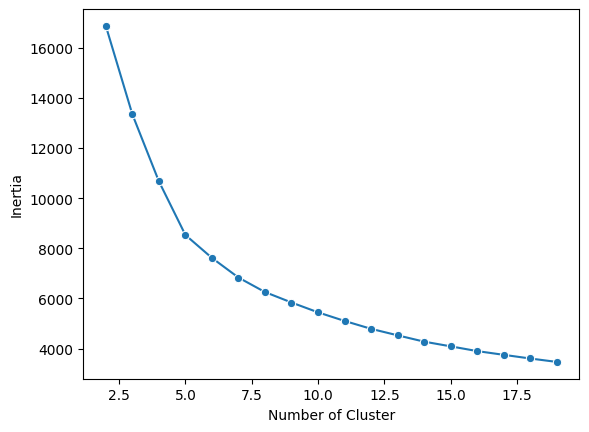

In [217]:
sns.lineplot(x=k_range, y=inertia, marker="o")
plt.xlabel("Number of Cluster")
plt.ylabel("Inertia")
plt.show()

In [218]:
#1. K-means
from sklearn.cluster import KMeans
km = KMeans(n_clusters=11,init='k-means++')
#ฟิต model กับ ข้อมูล X
km.fit(X)
#ตรวจสอบ Cluster labels
km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([8, 8, 3, ..., 0, 0, 8], dtype=int32)

In [219]:
#สร้าง column ใหม่ เป็น cluster labels
df['cluster'] = km.labels_

In [187]:
#g=sns.pairplot(hue='cluster',palette='tab20',data=df)

In [223]:
#คำนวณหาจุด centroid
df.groupby('cluster').mean()

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN
cluster,,,,
0,2011.050766,10.188558,23.991136,212.333747
1,2011.057951,2.867925,25.783019,210.503356
2,2011.442500,5.388750,7.230000,259.420637
3,2011.464819,9.304904,8.475480,133.043433
4,2011.344304,7.155696,10.143038,195.870291
5,2011.165529,7.863481,24.505119,148.603498
6,2011.703704,2.188272,5.449074,212.650262
7,2012.146489,5.221550,23.238499,258.915944
8,2011.194444,10.781893,8.102881,215.499825


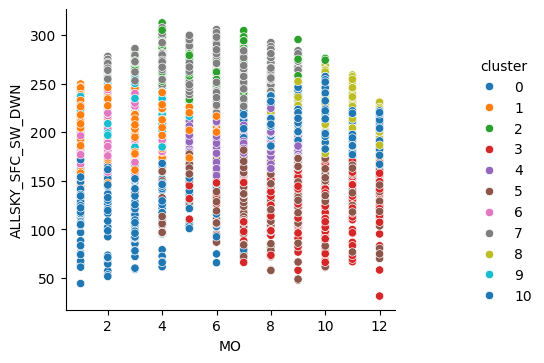

In [224]:
g = sns.pairplot(x_vars = 'MO',
                 y_vars = 'ALLSKY_SFC_SW_DWN',
                 hue = 'cluster',
                 palette = "tab10",
                 data = df)
g.fig.set_size_inches(6,4)

In [225]:
X=df.drop(['YEAR','cluster'],axis=1)

In [226]:
X

,MO,DY,ALLSKY_SFC_SW_DWN
0,12,1,191.90
1,12,2,176.30
2,12,3,160.10
3,12,4,175.20
4,12,5,202.80
...,...,...,...
8031,11,27,162.93
8032,11,28,197.66
8033,11,29,194.05
8034,11,30,186.02


In [227]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [228]:
X

array([[ 1.58775965, -1.67338161, -0.42539811],
       [ 1.58775965, -1.55975467, -0.79251047],
       [ 1.58775965, -1.44612772, -1.17374253],
       ...,
       [ 1.29781654,  1.5081729 , -0.3748025 ],
       [ 1.29781654,  1.62179984, -0.56377123],
       [ 1.58775965, -1.67338161, -0.55059284]])

In [229]:
#นิยามช่วงของ k
k_range = range(2, 20)
#สร้างตัวแปร scores และ inertia เพื่อเก็บค่าดังกล่าว
scores = {}
inertia=[]
for k in k_range: #Iterate through k
    #สร้าง model (ใช้อันไหนก็ได้)
    model = KMeans(n_clusters=k,init='k-means++')
    #ฟิต model กับ ชุดข้อมูล X
    model.fit(X)
    #เก็บค่า inertia (เฉพาะ k-means!!!!)
    inertia.append(model.inertia_)
    #เก็บค่า scores
    scores[k]=silhouette_score(X, model.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

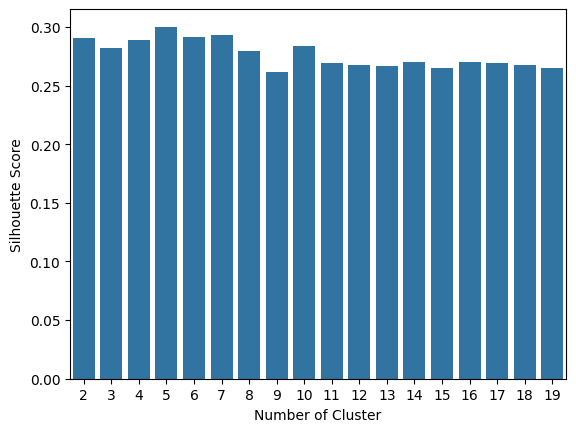

In [230]:
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [231]:
#1. K-means
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6,init='k-means++')
#ฟิต model กับ ข้อมูล X
km.fit(X)
#ตรวจสอบ Cluster labels
km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([3, 3, 3, ..., 0, 0, 3], dtype=int32)

In [232]:
#สร้าง column ใหม่ เป็น cluster labels
df['cluster'] = km.labels_

In [233]:
#คำนวณหาจุด centroid
df.groupby('cluster').mean()

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN
cluster,,,,
0,2011.132191,9.719094,23.904529,209.150447
1,2011.555270,2.708655,8.416452,207.136007
2,2011.427061,7.105708,16.567653,129.463436
3,2011.229181,9.958694,7.857428,204.028461
4,2011.575758,3.468151,23.987013,231.172406
5,2011.688301,5.214347,9.603757,257.360350


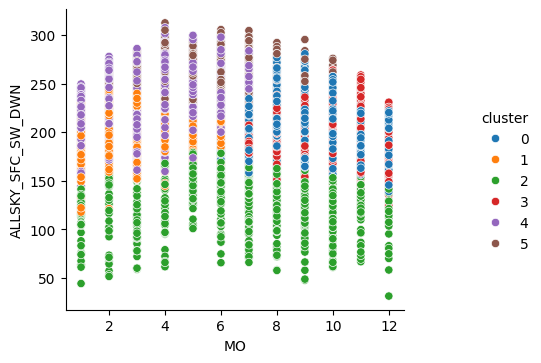

In [236]:
g = sns.pairplot(x_vars = 'MO',
                 y_vars = 'ALLSKY_SFC_SW_DWN',
                 hue = 'cluster',
                 palette = "tab10",
                 data = df)
g.fig.set_size_inches(6,4)

In [241]:
import plotly.express as px
import plotly
#นิยามสีของ cluster (ใส่ตามจำนวน cluster)
colors = np.arange(19)
#คำสั่ง Scatter plot
fig = px.scatter_3d(df, x='MO', y='ALLSKY_SFC_SW_DWN', z='DY',        color=colors[list(model.labels_)],color_continuous_scale  = plotly.colors.sequential.Jet)
#Show the figure
fig.show()


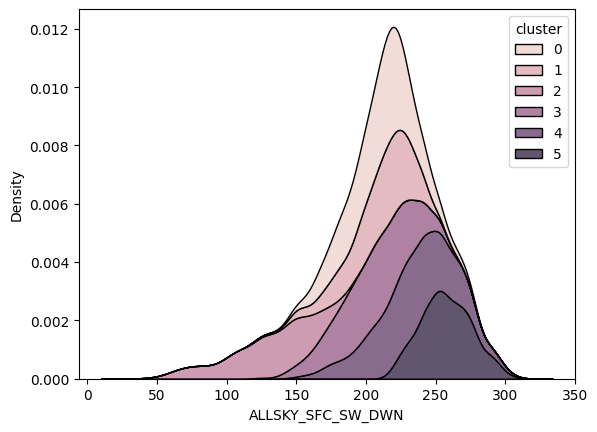

In [242]:
sns.kdeplot(data=df, x="ALLSKY_SFC_SW_DWN", hue="cluster", multiple="stack")
g.fig.set_size_inches(6,4)

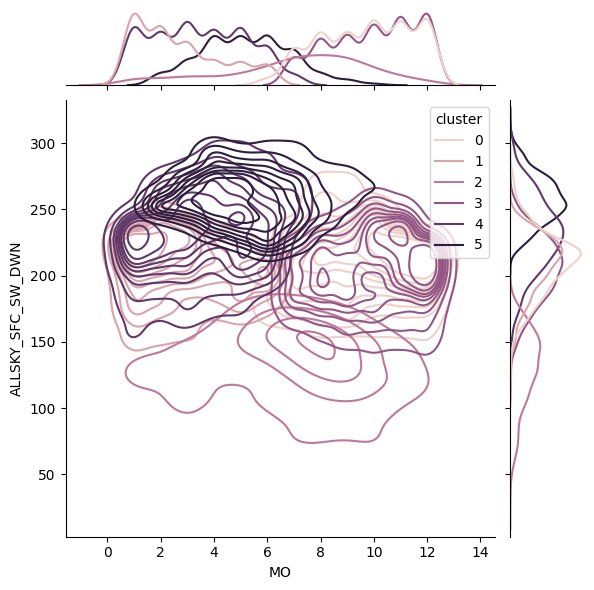

In [268]:
sns.jointplot(data=df, x="MO", y="ALLSKY_SFC_SW_DWN", hue="cluster", kind="kde")

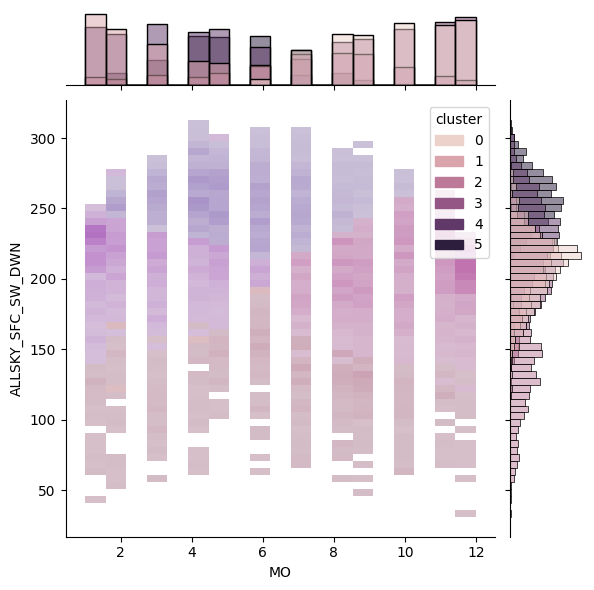

In [244]:
sns.jointplot(data=df, x="MO", y="ALLSKY_SFC_SW_DWN", hue="cluster", kind="hist")

In [211]:
df['cluster'].describe()

,cluster
count,8036.000000
mean,4.782852
std,3.220154
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,10.000000


In [212]:
df['cluster'].value_counts()

,count
cluster,
2,938
6,935
0,910
5,854
9,846
10,799
3,752
4,725
1,579


<Axes: xlabel='MO', ylabel='Count'>

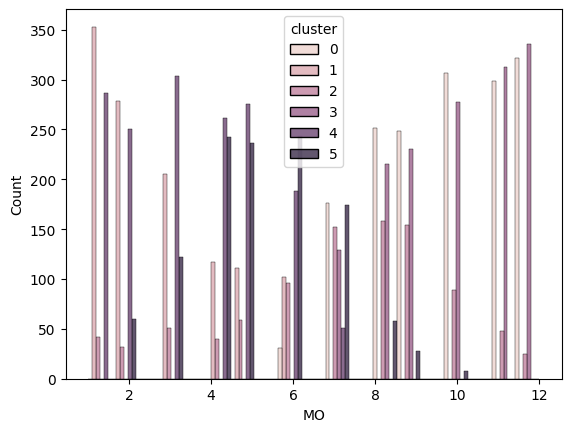

In [259]:
sns.histplot(data=df, x="MO", hue="cluster", multiple="dodge")

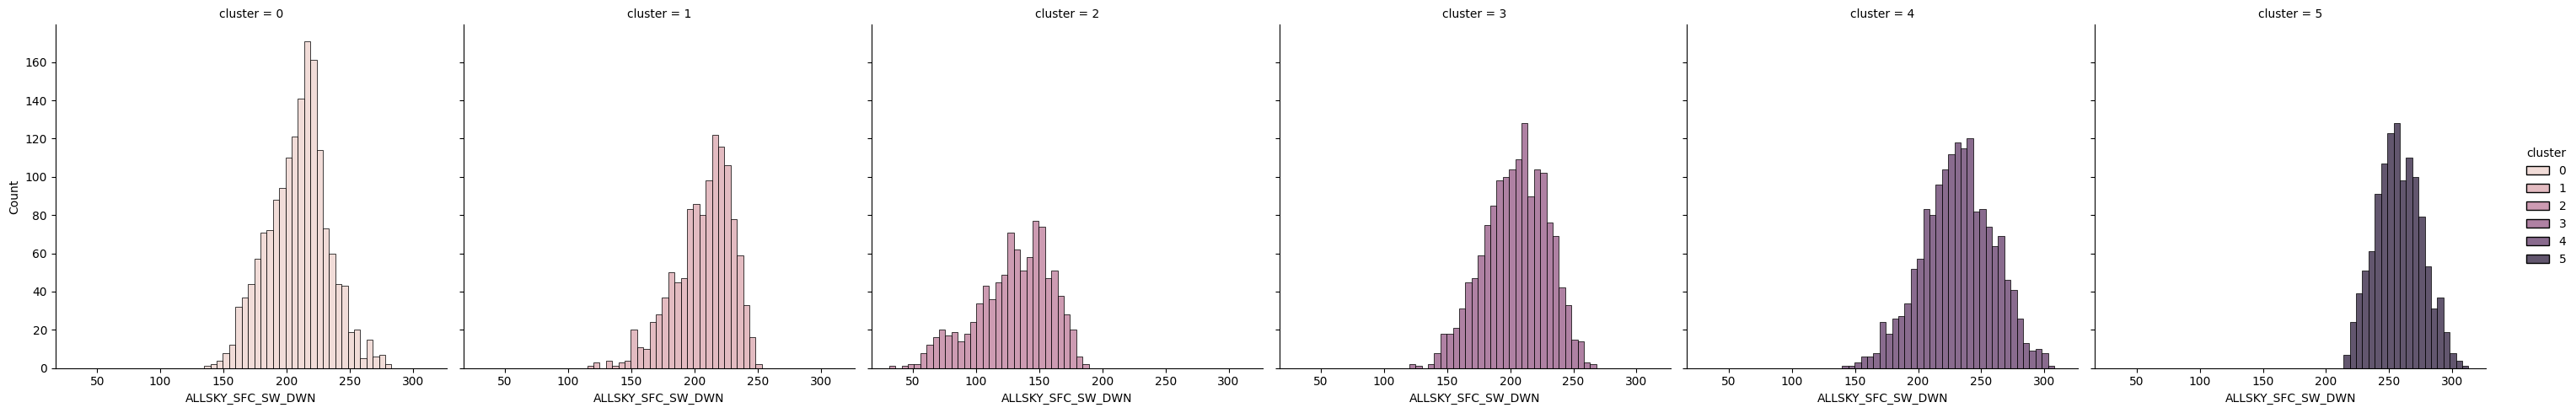

In [262]:
sns.displot(data=df, x="ALLSKY_SFC_SW_DWN", hue="cluster", multiple="stack", col='cluster')

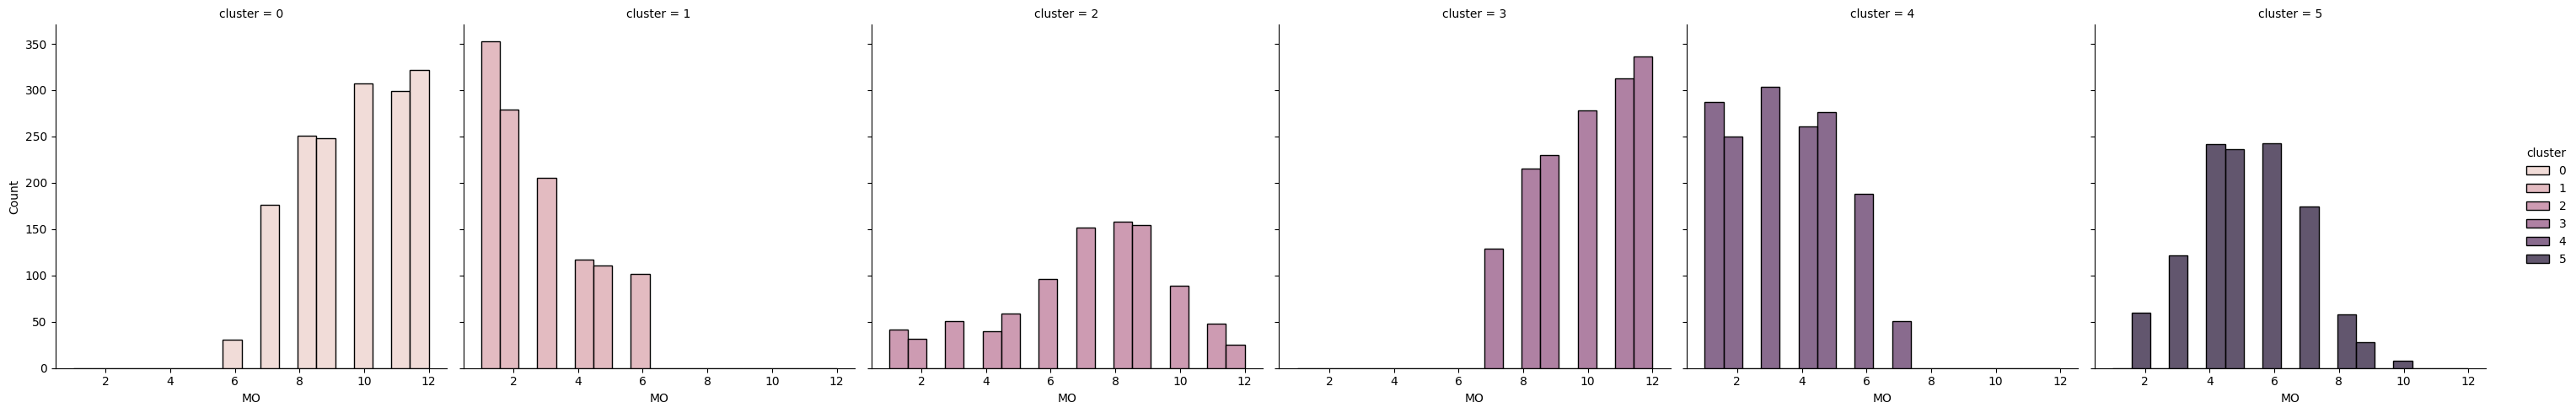

In [271]:
sns.displot(data=df, x="MO", hue="cluster", multiple="stack", col='cluster')

<Axes: xlabel='MO', ylabel='ALLSKY_SFC_SW_DWN'>

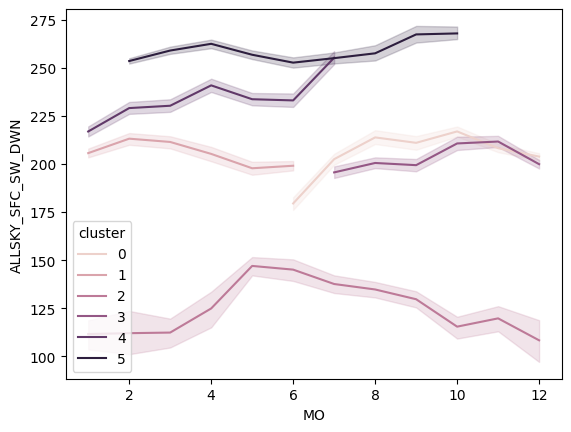

In [270]:
sns.lineplot(data=df, x="MO", y="ALLSKY_SFC_SW_DWN", hue="cluster")

<Axes: xlabel='ALLSKY_SFC_SW_DWN', ylabel='MO'>

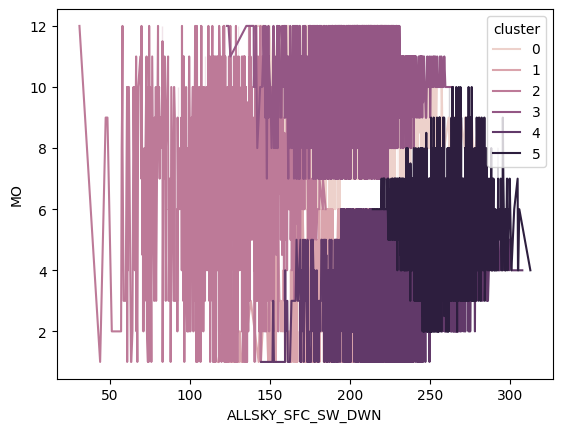

In [276]:
sns.lineplot(data=df, x="ALLSKY_SFC_SW_DWN", y="MO", hue="cluster")